TASK-7A: Please apply one-hot encoding method on one of the categorical variables (not SEX/gender) for the given AD dataset. Please explain what kind of transformation occured on the dataset.

In [2]:
import pandas as pd                                                             
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import numpy as np

model = GaussianNB()
data=pd.read_excel("Temporary_data3_Left_Right_Copy.xlsx")
Cdrglob = data["CDRGLOB"]
Asina=pd.get_dummies(data["NACCAPOE"])

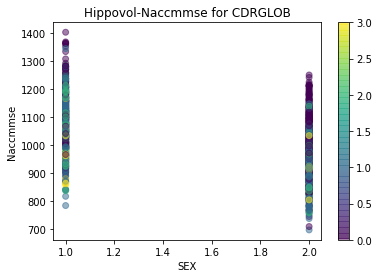

In [3]:
x = data["SEX"]
y = data["NACCBRNV"]
plt.scatter(x,y, cmap='viridis',c=data["CDRGLOB"], alpha=0.5,)
plt.xlabel('SEX')
plt.ylabel('Naccmmse')
plt.title('Hippovol-Naccmmse for CDRGLOB')
plt.colorbar()
plt.show()

TASK-7B: Please provide a couple of pivot tables in order to illustrate how SEX variable is influential on our target array (CDRGLOB). Please provide a few multidimensional analyses (not limited to two variables).

In [4]:
labels = ["NACCAPOE-1","NACCAPOE-2","NACCAPOE-3","NACCAPOE-4","NACCAPOE-5","NACCAPOE-6"]
a = pd.get_dummies(data["NACCAPOE"])
for label,i in zip(labels,range(6)):
  data[f"{label}"] = a.iloc[:,i]


In [5]:
data.iloc[:,-6:]


,NACCAPOE-1,NACCAPOE-2,NACCAPOE-3,NACCAPOE-4,NACCAPOE-5,NACCAPOE-6
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
1349,1,0,0,0,0,0
1350,1,0,0,0,0,0
1351,1,0,0,0,0,0
1352,1,0,0,0,0,0


In [6]:
data.pivot_table("CDRGLOB", index=['SEX',"HXHYPER"], columns="HYPERCHO")


HYPERCHO            0         1         2
SEX HXHYPER                              
1   0        0.743590  0.801980  0.666667
    1        0.957447  0.922764  1.900000
2   0        0.436620  0.492537  0.545455
    1        0.656250  0.719557  0.650000

In [7]:
data.pivot_table("CDRGLOB", index=['SEX',"DIABETES"], columns="ALCOHOL")


ALCOHOL              0         1         2
SEX DIABETES                              
1   0         0.858140  1.285714  1.074074
    1         0.861702  2.000000  1.090909
    2         1.000000       NaN  0.000000
2   0         0.590764  0.714286  0.400000
    1         0.581818       NaN  1.000000
    2         0.625000       NaN       NaN

TASK-7C: Referring to the problem in part B, please provide a potential solution to the gender-based issue that appears as a bottleneck for the model development phase. One possible solution might be to provide normalization of the numeric columns with respect to the total brain volume (NACCBRNV column).

In [8]:
data.iloc[:,37:-6] = data.iloc[:,37:-6].div(data.NACCBRNV,axis=0)


In [9]:
mask = (data.corr()>0.30) | (data.corr()<-0.30)
data.corr()[mask][16:17].dropna(1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  


,INDEPEND,CDRGLOB,DEL,AGIT,ANX,APA,DISN,IRR,MOT,NACCMMSE,...,CEREALL,CERECSF,LHIPPO,RHIPPO,LLATVENT,RLATVENT,THIRVENT,LTEMPCOR,LENTM,RENTM
CDRGLOB,0.693881,1.0,0.300995,0.373153,0.319968,0.448558,0.326447,0.319788,0.330414,-0.74666,...,0.367395,0.420518,-0.390896,-0.372265,0.443272,0.435256,0.38337,-0.305253,-0.366255,-0.3858


TASK-7D: After the normalization process, please provide a correlation matrix to report the critical features that have high correlation (positive or negative) with the target array (CDRGLOB).

In [10]:
mask = (data.corr()>0.30) | (data.corr()<-0.30)
data.corr()[mask][16:17].dropna(1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  


,INDEPEND,CDRGLOB,DEL,AGIT,ANX,APA,DISN,IRR,MOT,NACCMMSE,...,CEREALL,CERECSF,LHIPPO,RHIPPO,LLATVENT,RLATVENT,THIRVENT,LTEMPCOR,LENTM,RENTM
CDRGLOB,0.693881,1.0,0.300995,0.373153,0.319968,0.448558,0.326447,0.319788,0.330414,-0.74666,...,0.367395,0.420518,-0.390896,-0.372265,0.443272,0.435256,0.38337,-0.305253,-0.366255,-0.3858


In [11]:
data['NEW-1'] = (data['DEL']+data['AGIT']+data['IRR'])/3

In [12]:
data['NEW-2'] = (data['CSFVOL']*data['CEREALL']*data['CERECSF'])

In [13]:
data['NEW-3'] = (data['LLATVENT']*data['RLATVENT'])/(data['LHIPPO']*data['RHIPPO'])


In [14]:
data[['NEW-1','NEW-2','NEW-3','CDRGLOB']].corr().iloc[-1:,:-1]


,NEW-1,NEW-2,NEW-3
CDRGLOB,0.436518,0.393219,0.382166


TASK-7F: Then please develop a machine learning model with the 3 derived features that you obtain in 7F via the use of train-test split (be careful about stratify parameter in this function) and gridsearchCV function as well as a classification algorithm (such as Gaussian Naive Bayes) but please do not forget to optimize its hyperparameters. Finally, please report your findings via the use of classification report function (also a sklearn function).

In [15]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
New_dataframe=pd.concat([data['NEW-1'], data['NEW-2'],data['NEW-3']], axis=1)
model=BernoulliNB() 
X1, X2, y1, y2 = train_test_split(New_dataframe,Cdrglob , random_state=0,     
                                  train_size=0.2)

model.fit(X1,y1)                                                                
y_pred = model.predict(X2)
param_grid = {'alpha': [1,2,5,10,20],                                       
              'binarize': [0,1,2,5,10],
              'fit_prior' : [True,False]}

grid = GridSearchCV(model, param_grid, cv=15)                             
grid.fit(X1, y1)                                                 
print(grid.best_params_)                                                 
best_grid = grid.best_estimator_                                      
grid_best = best_grid.fit(X1, y1).predict(X2)                                 

print("accuracy score for default parameters: ",accuracy_score(y2,y_pred))
print("Accuracy score for best parameters: ",accuracy_score(y2,grid_best))


print(classification_report(y2, y_pred))

{'alpha': 1, 'binarize': 0, 'fit_prior': True}
accuracy score for default parameters:  0.5747232472324724
Accuracy score for best parameters:  0.5747232472324724
              precision    recall  f1-score   support

           0       0.60      0.90      0.72       527
           1       0.51      0.38      0.43       393
           2       0.00      0.00      0.00       133
           3       0.00      0.00      0.00        31

    accuracy                           0.57      1084
   macro avg       0.28      0.32      0.29      1084
weighted avg       0.48      0.57      0.51      1084



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
